In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data Collection and Analysis

In [9]:
#Loading the data from csv file to pandas Dataframe
df=pd.read_csv('sales_data.csv', encoding = 'unicode_escape')

In [10]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1,...,12,61,37,14,1067.92,5674.65,3916.53,1327.44,NaN,NaN
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1,...,1,13,24,44,30.25,3143.69,2205.47,5646.55,NaN,33340.77
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1,...,0,6,12,25,0.00,707.98,2560.91,3990.80,NaN,NaN
3,95,44,6992.27,158.92,92.82,2.11,09-Apr-19,24-Oct-21,21.11,1,...,0,10,13,21,0.00,1908.99,2025.05,3058.23,NaN,NaN
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1,...,6,9,27,13,501.34,1197.83,3004.77,1559.50,NaN,NaN


In [11]:
df.shape

(5000, 42)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   int64

In [19]:
df['TOTAL_ORDERS']

0       124
1        82
2        43
3        44
4        55
       ... 
4995      1
4996      1
4997      1
4998      1
4999      2
Name: TOTAL_ORDERS, Length: 5000, dtype: int64

In [14]:
df.drop('Unnamed: 40', axis=1, inplace=True)

In [15]:
df.drop('Unnamed: 41', axis=1, inplace=True)

In [18]:
#choosing the TOTAL_ORDERS and REVENUE columns 
X=df.iloc[:,[1,2]].values
print(X)

[[1.240000e+02 1.198654e+04]
 [8.200000e+01 1.102596e+04]
 [4.300000e+01 7.259690e+03]
 ...
 [1.000000e+00 1.174900e+02]
 [1.000000e+00 1.174900e+02]
 [2.000000e+00 9.414000e+01]]


In [20]:
#Choosing the number of Cluster
#Finding wcss value for different number of clusters

In [22]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    

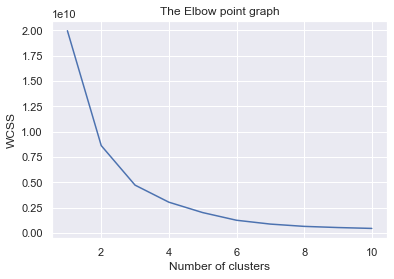

In [23]:
#plot an Elbow graph
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Training the K-means clustering model
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)


In [25]:
#retun a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[2 2 2 ... 0 0 0]


Visualization

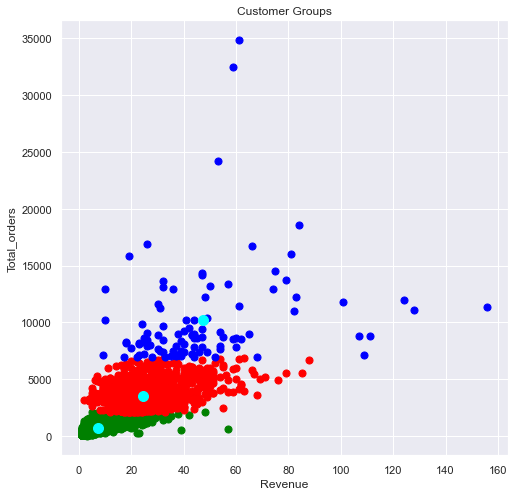

In [29]:
#Plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='champions')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Potential customers')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='need attention')


#plot Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title('Customer Groups')
plt.xlabel('Revenue')
plt.ylabel('Total_orders')
plt.show()

In [ ]:
df